<a href="https://colab.research.google.com/github/parishtherealone/github_demo/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step


(50000, 32, 32, 3)

In [3]:
Y_train = Y_train.reshape(-1,)

In [4]:
Y_test = Y_test.reshape(-1,)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [8]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, Y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3067 - loss: 1.9275
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4133 - loss: 1.6478
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4549 - loss: 1.5509
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4739 - loss: 1.4846
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4932 - loss: 1.4391


In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
cnn.fit(X_train, Y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3830 - loss: 1.7029
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5918 - loss: 1.1544
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6500 - loss: 1.0050
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6814 - loss: 0.9217
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7038 - loss: 0.8491
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7256 - loss: 0.7842
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7392 - loss: 0.7438
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7587 - loss: 0.6947
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7716 - loss: 0.6507
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7911 - loss: 0.6017


In [15]:
cnn.evaluate(X_test,Y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6855 - loss: 0.9597


[0.9777945280075073, 0.682200014591217]

In [16]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.77544367e-03, 7.95660599e-04, 1.76178315e-03, 8.53033364e-01,
        4.93022380e-04, 9.75825265e-02, 3.27567267e-03, 2.61545210e-04,
        4.09068726e-02, 1.14209004e-04],
       [2.98337601e-02, 6.54795110e-01, 1.75651519e-06, 4.04661932e-06,
        1.58523561e-09, 3.75195590e-08, 4.82843383e-08, 5.93868688e-09,
        3.14333856e-01, 1.03133800e-03],
       [1.42845362e-01, 7.33798444e-01, 7.19428761e-04, 1.41800381e-03,
        3.43904539e-04, 1.98429436e-04, 7.10379827e-05, 4.04329359e-04,
        5.59268296e-02, 6.42744601e-02],
       [9.75129068e-01, 1.12434858e-02, 1.43756869e-03, 7.02240155e-04,
        1.81001844e-04, 1.85661647e-05, 3.18181592e-05, 2.58314467e-05,
        1.02504408e-02, 9.79986624e-04],
       [1.75466664e-06, 2.45898682e-05, 3.30657065e-02, 4.66432869e-02,
        7.59707391e-01, 7.26683205e-03, 1.53269336e-01, 1.38281814e-06,
        1.88255708e-05, 7.92911862e-07]], dtype=float32)

In [17]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(1), np.int64(1), np.int64(0), np.int64(4)]

In [19]:
Y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

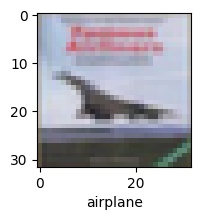

In [24]:
plot_sample(X_test, Y_test,3)


In [22]:
classes[y_classes[3]]


'airplane'